# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#получаем данные из датафрейма
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#сначала нужно посмотреть, что за датафрейм и с какими данными мы имеем дело, поэтому обратимся к функции .info() и display
data.info()
display(data.head(10))
display(data.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


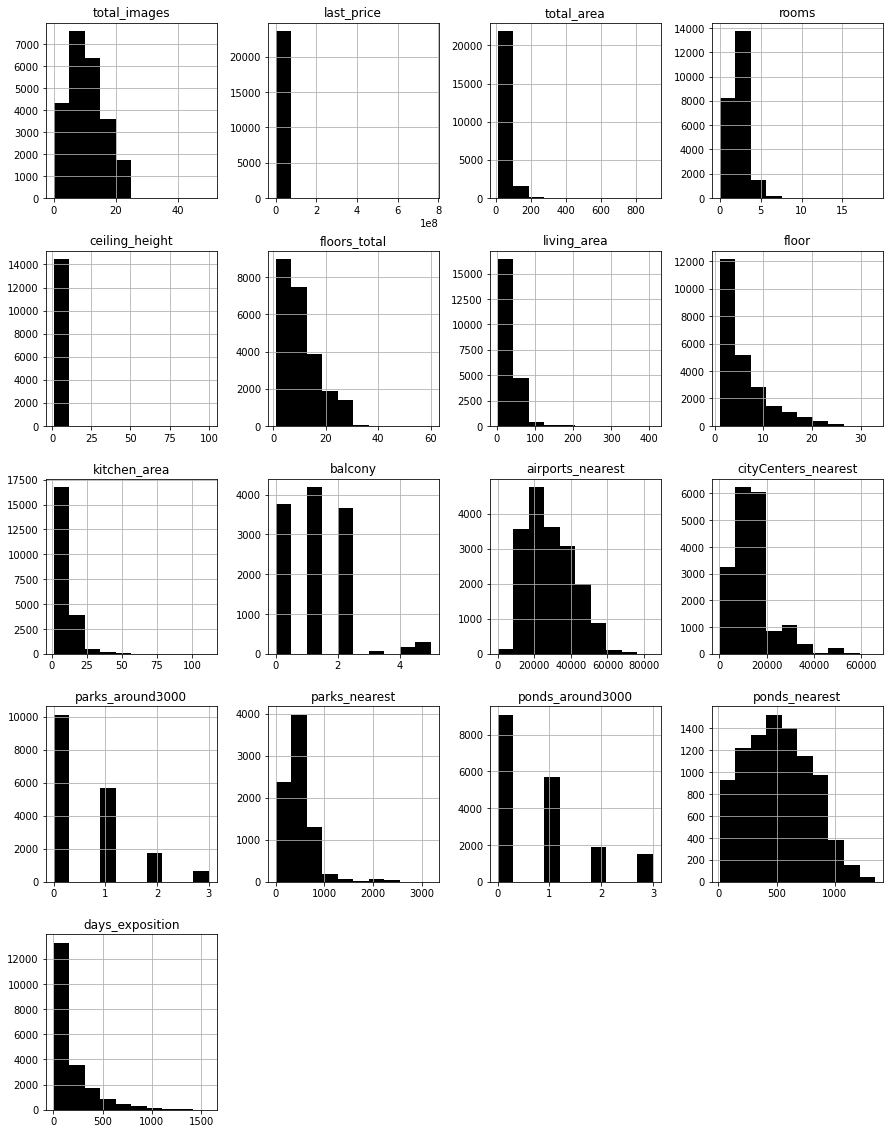

In [3]:
#Построим гистограммы для каждого из столбцов датафрейма
data.hist(figsize=(15, 20), color='black');

<div class="alert alert-info">
<b>Первый взгляд:</b>
    <br> 1. Получили датасет, подключили библиотеку пандас, прочитали файл
    <br> 2. Обратимся к методу .info() и посмотрим на общее содержание файла
    <br> 3. Сделали следующие выводы - всего 22 столбца и среди них очень много столбцов в формате десятичных. число с запятой. сразу можно заподозрить неладное, потому что даже столбец floors_total в формате числа с запятой. 
    <br> 4. обратимся по очереди к методам .head и .tail и посмотрим на примерное содержание столбцов (потому что хочется именно 10 строк посмотреть).
    <br> 5. подозрения оправдались. множество столбцов имеют странный формат, а именно:
<p>
    <br> - <b>last_price</b> на первый взгляд столбец с последней ценой мог бы быть в формате целого числа int, но как мне кажется float здесь подходит, потому что цены форматируют в целые числа только при общих отчетах, в самих данных позволительно оставлять float (но я могу ошибаться)
    <br> - <b>first_day_exposition</b> - точно нужно менять на date, а не object
    <br> - <b>ceiling_height</b> - есть пустые значения (надо будет в будущих шагах что-то с этим сделать)
    <br> - <b>floors_total</b> - нужно менять на int
    <br> - <b>living_area</b> - есть пустые значения
    <br> - <b>is_apartment</b> - тут полно пустых значений, но скорее всего этот столбец должен содержать булевые значения (подсказка в наименование столбца is_что-то, это вопрос "является ли", а ответ или да или нет, поэтому нужно будет заполнить  False)
    <br> - <b>kitchen_area</b> - есть пустые значения
    <br> - <b>balcony</b> - есть пустые значения и при этом есть 0, плюс если это количество, то нужно перевести в формат int
    <br> - <b>airports_nearest</b> - есть пустые значения
    <br> - <b>cityCenters_nearest</b> - есть пустые значения
    <br> - <b>parks_around3000</b> - есть пустые значения и нужно перевести в формат int
    <br> - <b>parks_nearest</b> - есть пустые значения
    <br> - <b>days_exposition</b> - есть пустые значения и нужно перевести в формат int
</div>
    

### Предобработка данных

<div class="alert alert-info">
<b>Теперь проведем соответствующую обработку, выделенных в первом шаге, столбцов:</b>

In [4]:
#меняем на текст на формат даты в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [5]:
#заполняем пустые значения высоты потолков медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [6]:
#поменяем формат floors_total на int, однако в этом столбце есть пустые значения. кажется, что в таком случае количество этажей должно быть 0
data['floors_total'] = data['floors_total'].fillna(0).astype(int)

In [7]:
#посмотрим соотношение жилой площади к общей площади. заменим все пустоты полученным значением
#data['total_area'].describe()
#data['living_area'].describe()
data['living_area'] = data['living_area'].fillna(data['living_area'].mean() * data['total_area'] / data['total_area'].mean())

In [8]:
#заменим все пустоты в столбце is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [9]:
#посмотрим соотношение площади кухонь к общей площади. заменим все пустоты полученным значением
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean() * data['total_area'] / data['total_area'].mean())

In [10]:
#столбец balcony меняем на int, пустоты заменяем на 0
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [11]:
#просмотрел еще раз столбец с ближайшими аэропортами, нашел там город Тихвин. загуглил. там вообще не осуществляются авиаперевозки, ближайших аэропорт в Сант-Петербурге (примерно ~185 км)
#заполнять средним значением с группировкой по городу считаю не целесообразным, проще оставить как есть
#data['airports_nearest'] = 
#со столбцом cityCenters_nearest ситуация схожа, невозможно определить что является центром для того или иного объекта
#data['cityCenters_nearest'] = 
#столбец parks_around3000 меняем на int, пустоты заменяем на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

<div class="alert alert-info">
<b>Посмотрим на странные значения в разных столбцах:</b>
<br>сначала высотка потолков
</div>

In [12]:
#посмотрим на странные значения в столбце высоты потолков
datatest = data[data['ceiling_height'] >= 4]
display(datatest)
datatest2 = data[data['ceiling_height'] <= 1.8]
display(datatest2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,12.200000,0,Санкт-Петербург,20562.0,3167.0,2,344.0,1.0,838.0,38.0
179,5,14800000.0,108.7,2019-04-11,3,4.00,5,72.4,5,False,...,8.000000,0,Санкт-Петербург,23017.0,2559.0,1,559.0,0.0,NaN,NaN
355,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.0,2,False,...,9.668043,2,Гатчина,NaN,NaN,0,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,...,21.100000,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.0,3,False,...,63.000000,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1.0,603.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6,55.5,5,False,...,16.500000,4,Санкт-Петербург,18838.0,3506.0,0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.0,9,False,...,45.000000,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5,14.0,5,True,...,11.000000,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3.0,30.0,19.0
22938,14,4000000.0,98.0,2018-03-15,4,27.00,2,73.0,2,True,...,9.000000,1,деревня Нижняя,NaN,NaN,0,NaN,NaN,NaN,27.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2.0,289.0,13.0


<div class="alert alert-info">всего таких записей 117 штук
</div>

In [13]:
#уберем эти значения
datanew = data.query('ceiling_height <= 4 and ceiling_height >= 1.8')
datanew.shape[0] / data.shape[0]

0.9967087218869994

<div class="alert alert-info">
<b>Посмотрим на странные значения в разных столбцах:</b>
<br>теперь стоимость
<br>нет смысла ограничивать значения по вернему лимиту, потому что недвижимость может стоить баснословных денег, поэтому уберем только экстрадешевое жилье
</div>

In [14]:
datatest = data[data['last_price'] <= 200000]
#plt.boxplot(data['last_price'].tail(10))
print(datatest)

      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7     12190.0       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793            2.75            25         32.0     25         False  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
8793          40.5        0  Санкт-Петербург           36421.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793              9176.0                 1          805.0               0.0   

      ponds_nearest  days_exposition  
8793            NaN              8.0  

[1 rows x 22 columns]


In [15]:
datanew = data.query('ceiling_height <= 4 and ceiling_height >= 1.8 and last_price >= 200000')
datanew.shape[0] / data.shape[0]

0.9966665260137558

<div class="alert alert-info">
<b>Посмотрим на странные значения в разных столбцах:</b>
<br>теперь площадь
</div>

In [16]:
datatest = data[data['total_area'] <= 20]
display(datatest)
#plt.boxplot(datanew['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.000000,1,False,...,2.977477,0,посёлок Шушары,18654.0,29846.0,0,NaN,0.0,NaN,40.0
4077,10,3000000.0,20.00,2017-04-10,2,2.65,6,13.000000,2,False,...,5.600000,0,Санкт-Петербург,28450.0,6996.0,2,223.0,1.0,611.0,16.0
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.000000,2,False,...,3.152623,0,Санкт-Петербург,25157.0,4948.0,2,349.0,1.0,963.0,9.0
5312,3,1800000.0,20.00,2018-02-01,0,2.65,19,16.000000,10,False,...,3.502914,0,деревня Кудрово,NaN,NaN,0,NaN,NaN,NaN,53.0
5855,3,945750.0,19.50,2017-09-18,0,2.76,3,12.700000,2,False,...,3.415341,0,поселок городского типа Дубровка,NaN,NaN,0,NaN,NaN,NaN,3.0
6084,6,770000.0,18.00,2017-10-16,1,2.65,5,13.000000,4,False,...,3.000000,0,Тихвин,NaN,NaN,0,NaN,NaN,NaN,90.0
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6,10.848614,2,False,...,3.327768,0,Санкт-Петербург,12430.0,7316.0,1,238.0,3.0,374.0,44.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.000000,3,False,...,2.400000,0,Пушкин,20710.0,30687.0,0,NaN,1.0,155.0,59.0
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19,15.800000,1,False,...,3.292739,0,Санкт-Петербург,37636.0,14479.0,0,NaN,1.0,1127.0,128.0
8873,6,2950000.0,20.00,2016-06-18,1,2.65,7,14.000000,1,False,...,6.000000,0,Санкт-Петербург,24053.0,4621.0,1,247.0,0.0,NaN,38.0


In [17]:
datanew = data.query('ceiling_height <= 4 and ceiling_height >= 1.8 and last_price >= 200000 and total_area >= 20')
datanew.shape[0] / data.shape[0]

0.9955272374361788

<div class="alert alert-info">
<b>Посмотрим на странные значения в разных столбцах:</b>
<br>теперь количество комнат (уберем те, которые равно 0)
</div>

In [18]:
datanew = data.query('ceiling_height <= 4 and ceiling_height >= 1.8 and last_price >= 200000 and total_area >= 20 and rooms != 0')
datanew.shape[0] / data.shape[0]

0.9876366091396261

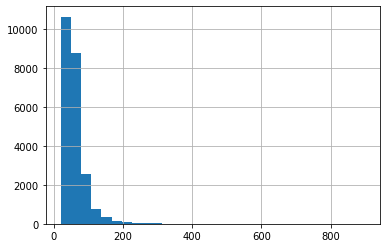

In [61]:
datanew['total_area'].hist(bins=30);

<div class="alert alert-info">Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.
</div>

In [19]:
#Судя по всему можно заменить схожие значения на более универсальное, чтобы в итоге все объеденилось в одной категории
datanew['new_locality_name'] = datanew['locality_name'].replace(regex=['городской посёлок', 'городской поселок','посёлок', 'поселок городского типа', 'посёлок городского типа'], value='поселок')

print(datanew['new_locality_name'].tail(30))

23669                 Колпино
23670        поселок Синявино
23671         Санкт-Петербург
23672         Санкт-Петербург
23673         Санкт-Петербург
23674         Санкт-Петербург
23675         Санкт-Петербург
23676         Санкт-Петербург
23677              Всеволожск
23678                  Пушкин
23679            Сосновый Бор
23680         Санкт-Петербург
23681         Санкт-Петербург
23682                  Выборг
23683    поселок Дзержинского
23684         Санкт-Петербург
23685               Ломоносов
23686         Санкт-Петербург
23687         Санкт-Петербург
23688         Санкт-Петербург
23689         Санкт-Петербург
23690         Санкт-Петербург
23691         Санкт-Петербург
23692                  Тихвин
23693                Петергоф
23694         Санкт-Петербург
23695                   Тосно
23696        село Рождествено
23697         Санкт-Петербург
23698     поселок Новый Учхоз
Name: new_locality_name, dtype: object


/tmp/ipykernel_735/927578193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['new_locality_name'] = datanew['locality_name'].replace(regex=['городской посёлок', 'городской поселок','посёлок', 'поселок городского типа', 'посёлок городского типа'], value='поселок')


<div class="alert alert-info">Вывод: т.к. посёлок Тельмана и поселок Тельмана это одно и то же название, просто в одном названии написано через "ё", а в другом через "е" мы привели все данные в соответствие частичной заменой названий в которых присутствует слово "поселок" (например поселок городского типа, или городской поселок) на одно универсальное - просто "поселок". Таким образом будет проще группировать данные по локациям
</div>

### Посчитайте и добавьте в таблицу новые столбцы

<div class="alert alert-info">
<b>Необходимо добавить столбцы:</b>
<br>-Цена квадратного метра
<br>-День недели, месяц и год публикации объявления
<br>-Этаж квартиры, варианты - первый, последний, другой
<br>-Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
#добавим столбец с расчетом цена за 1 кв.метр.нужно разделить цену на общую площадь, в добавок оставим 2 знака после запятой
datanew['price_per_metersquared'] = round(datanew['last_price'] / datanew['total_area'], 2)

/tmp/ipykernel_735/2771863643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['price_per_metersquared'] = round(datanew['last_price'] / datanew['total_area'], 2)


In [21]:
#добавим столбец, который показывает день недели даты публикации объявления
datanew['date_weekday'] = datanew['first_day_exposition'].dt.weekday

/tmp/ipykernel_735/3601197928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['date_weekday'] = datanew['first_day_exposition'].dt.weekday


In [22]:
#добавим столбец, который показывает месяц даты публикации объявления
datanew['date_month'] = datanew['first_day_exposition'].dt.month

/tmp/ipykernel_735/2548659820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['date_month'] = datanew['first_day_exposition'].dt.month


In [23]:
#добавим столбец, который показывает год даты публикации объявления
datanew['date_year'] = datanew['first_day_exposition'].dt.year

/tmp/ipykernel_735/2949228647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['date_year'] = datanew['first_day_exposition'].dt.year


In [24]:
#создадим функцию, которая будет определять один из трех типов этажей
def floor_stuff(item):
    if item['floor'] == 1:
        return 'Первый'
    elif item['floor'] == item['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
#Теперь добавим столбец с этими категориями
datanew['floor_type'] = datanew.apply(floor_stuff, axis=1)

/tmp/ipykernel_735/3051600409.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['floor_type'] = datanew.apply(floor_stuff, axis=1)


In [25]:
#Добавим столбец с соотношением жилой площади к общей площади
datanew['living_area_ratio'] = datanew['living_area'] / datanew['total_area']

/tmp/ipykernel_735/3100487123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['living_area_ratio'] = datanew['living_area'] / datanew['total_area']


In [26]:
#Добавим столбец с соотношением площади кухни к общей площади
datanew['kitchen_area_ratio'] = datanew['kitchen_area'] / datanew['total_area']

/tmp/ipykernel_735/1323422308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['kitchen_area_ratio'] = datanew['kitchen_area'] / datanew['total_area']


In [27]:
#Округлим значения в колонке расстояние до центра и приведем к типу int
datanew['cityCenters_nearest'] = round(datanew['cityCenters_nearest'], 0)
datanew['cityCenters_nearest'].fillna(0).astype(int)

/tmp/ipykernel_735/1000593757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cityCenters_nearest'] = round(datanew['cityCenters_nearest'], 0)


0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695        0
23696        0
23697    10364
23698        0
Name: cityCenters_nearest, Length: 23406, dtype: int64

In [28]:
#добавим столбец, в котором переведем все в км (оставим 1 знак после запятой)
datanew['cityCenters_nearest_inKM'] = round(datanew['cityCenters_nearest'] / 1000, 0)
datanew['cityCenters_nearest_inKM'].fillna(0).astype(int)

/tmp/ipykernel_735/2335173405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cityCenters_nearest_inKM'] = round(datanew['cityCenters_nearest'] / 1000, 0)


0        16
1        19
2        14
3         7
4         8
         ..
23694     4
23695     0
23696     0
23697    10
23698     0
Name: cityCenters_nearest_inKM, Length: 23406, dtype: int64

### Проведите исследовательский анализ данных

<div class="alert alert-info">
<b>Изучение параметров 1:</b>
<br>-Площадь
<br>-Цена + Цена за квадратный метр
<br>-Число комнат
<br>-Высота потолков

<div class="alert alert-info">
<H1>ПЛОЩАДЬ</H1>

Самые большие по площади объекты недвижимости:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

Самые маленькие по площади объекты недвижимости:
17860    20.0
21419    20.0
10964    20.0
8873     20.0
4077     20.0
Name: total_area, dtype: float64

Подробнее:


count    23406.000000
mean        60.474609
std         34.984201
min         20.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

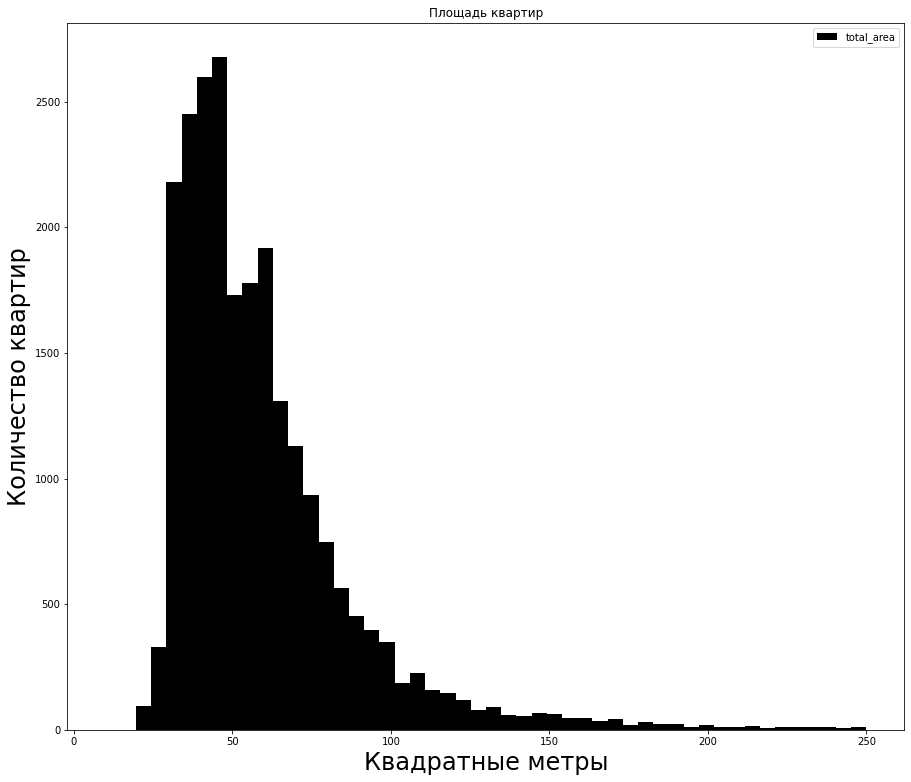

In [29]:
#Площадь (замаялся гуглить, как без mathplotlib поменять в обычном plot подписи осей x и y) и не понятно как убрать эту подпись сверху [Text(0.5, 0, 'Квадратные метры'), Text(0, 0.5, 'Количество квартир')]
square_space = datanew.plot(colormap='CMRmap',y = 'total_area', kind = 'hist', bins = 50, grid=False, figsize = (15,13), range = (10,250), title = 'Площадь квартир')
square_space.set_ylabel('Количество квартир',fontdict={'fontsize':24})
square_space.set_xlabel('Квадратные метры',fontdict={'fontsize':24})
#square_space.set(xlabel='Квадратные метры', ylabel ='Количество квартир')
print('Самые большие по площади объекты недвижимости:')
print(datanew['total_area'].sort_values(ascending=False).head())
print()
print('Самые маленькие по площади объекты недвижимости:')
print(datanew['total_area'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['total_area'].describe()

<div class="alert alert-info">
<H1>ПЛОЩАДЬ ВЫВОД:</H1>
<br>-На построенном графике мы можем наблюдатЬ, что в представленном датафрейме по количеству преобладают объекты недвижимости с площадью в районе 60кв.м. скорее всего это самые популярные виды недвижимости, которые пользуются большим спросом.
<br>-Так же мы видим резкий переход от небольшого количества квартир в районе 25-30кв.м. это может быть связано с минимальными техническими требованиями к жилью, объектов с экстремально маленькой площадью значительно меньше, потому что скорее всего их технические характеристики не соответствуют общим нормам или СНИПам
<br>-Еще мы можем наблюдать то, что с увеличение площади количество объектов постепенно уменьшается. это гласит о том, что подобные объекты все же имеют место быть, но их предложения на рынке не столь обширны, как у объектов с площадью меньше

<div class="alert alert-info">
<H1>ЦЕНА</H1>

Самые дорогие объекты недвижимости:
12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
Name: last_price, dtype: float64

Самые дешевые объекты недвижимости:
14911    430000.0
17456    430000.0
16274    440000.0
5698     450000.0
16219    450000.0
Name: last_price, dtype: float64

Подробнее:


/tmp/ipykernel_735/2770503986.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['last_price'] = datanew['last_price'] / 1000000


count    23406.000000
mean         6.524753
std         10.751502
min          0.430000
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

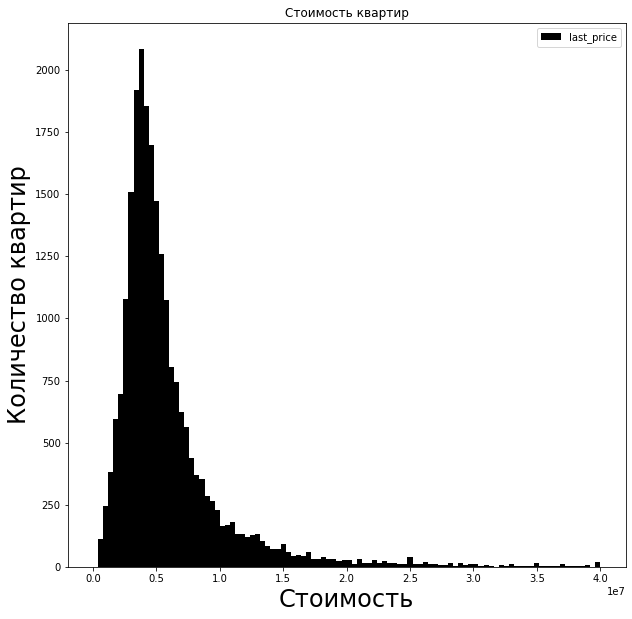

In [30]:
#Цена
square_space = datanew.plot(colormap='CMRmap',y = 'last_price', kind = 'hist', bins = 100, grid=False, figsize = (10,10), range = (0,40000000), title = 'Стоимость квартир')
square_space.set_ylabel('Количество квартир',fontdict={'fontsize':24})
square_space.set_xlabel('Стоимость',fontdict={'fontsize':24})
#square_space.set(xlabel='Стоимость', ylabel ='Количество квартир')
print('Самые дорогие объекты недвижимости:')
print(datanew['last_price'].sort_values(ascending=False).head())
print()
print('Самые дешевые объекты недвижимости:')
print(datanew['last_price'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['last_price'] = datanew['last_price'] / 1000000
datanew['last_price'].describe()

<div class="alert alert-info">
<H1>ЦЕНА ВЫВОД:</H1>
<br>-На представленном графике видим очень схожую картину с графиком по площади (это первая подсказка к тому, что цена очень хорошо корелирует с площадью). Наибольшее количество объектов представлены в районе 5 млн.
<br>-Соответственно так же можно наблюдать следующую тенденцию: с увеличение цены - меньше предложений, меньше объектов

<div class="alert alert-info">
<H1>ЦЕНА ЗА 1 Кв.М</H1>

Самые дорогие объекты недвижимости (за 1 кв.м):
12971    1907500.00
1436     1736842.11
22831    1542604.80
14706    1000748.13
4996      995983.94
Name: price_per_metersquared, dtype: float64

Самые дешевые объекты недвижимости (за 1 кв.м):
14911     7962.96
4405      9615.38
11351    10185.19
9581     10368.66
23477    10507.25
Name: price_per_metersquared, dtype: float64

Подробнее:


count    2.340600e+04
mean     9.916386e+04
std      4.989819e+04
min      7.962960e+03
25%      7.647059e+04
50%      9.482982e+04
75%      1.139974e+05
max      1.907500e+06
Name: price_per_metersquared, dtype: float64

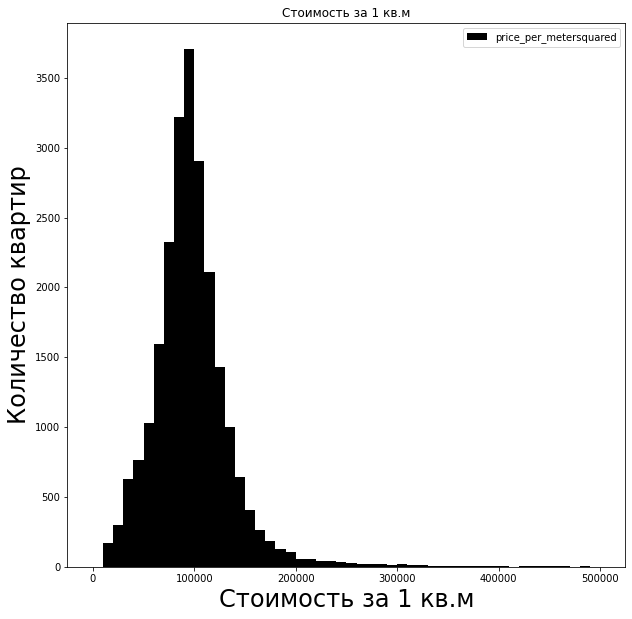

In [31]:
#Цена за 1 кв.м
price_per_sq_m = datanew.plot(colormap='CMRmap',y = 'price_per_metersquared', kind = 'hist', bins = 50, grid=False, figsize = (10,10), range = (10,500000), title = 'Стоимость за 1 кв.м')
price_per_sq_m.set_ylabel('Количество квартир',fontdict={'fontsize':24})
price_per_sq_m.set_xlabel('Стоимость за 1 кв.м',fontdict={'fontsize':24})
print('Самые дорогие объекты недвижимости (за 1 кв.м):')
print(datanew['price_per_metersquared'].sort_values(ascending=False).head())
print()
print('Самые дешевые объекты недвижимости (за 1 кв.м):')
print(datanew['price_per_metersquared'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['price_per_metersquared'].describe()

<div class="alert alert-info">
<H1>ЦЕНА ЗА 1 Кв.М ВЫВОД:</H1>
<br>-По графику можно сказать, что имеет место быть нормальное распределение. Стоимость 1 кв.м большинства квартир в районе 100т.р
<br>-Так же есть объекты (пускай и совсем мало) с огроменной стоимостью за 1 кв.м. Может быть это какое-то элитное жилье

<div class="alert alert-info">
<H1>ЧИСЛО КОМНАТ</H1>

Объекты недвижимости с наибольшим количеством комнат:
14498    19
18848    16
5358     15
20829    14
866      14
Name: rooms, dtype: int64

Объекты недвижимости с наименьшим количеством комнат
23698    1
9514     1
9515     1
9516     1
20390    1
Name: rooms, dtype: int64

Подробнее:


count    23406.000000
mean         2.086815
std          1.063656
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

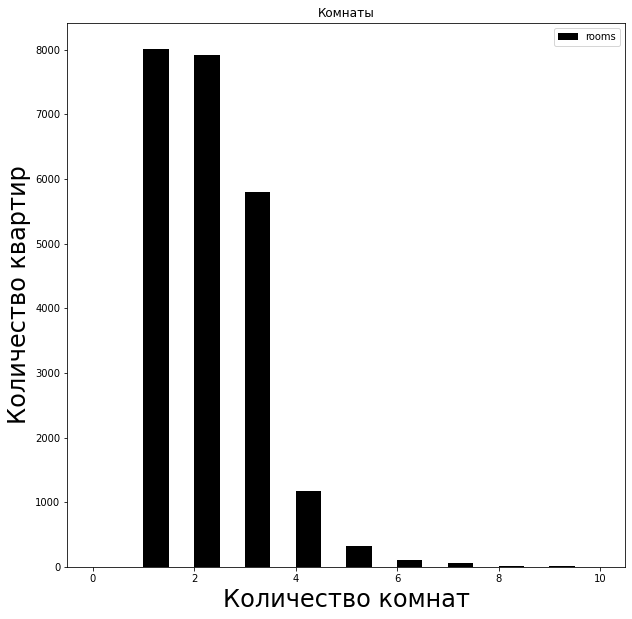

In [32]:
#Число комнат
#get_nonzero_rooms = datanew.loc[data['rooms'] > 0]

rooms = datanew.plot(colormap='CMRmap',y = 'rooms', kind = 'hist', bins = 20, grid=False, figsize = (10,10), range = (0,10), title = 'Комнаты')
rooms.set_ylabel('Количество квартир',fontdict={'fontsize':24})
rooms.set_xlabel('Количество комнат',fontdict={'fontsize':24})
print('Объекты недвижимости с наибольшим количеством комнат:')
print(datanew['rooms'].sort_values(ascending=False).head())
print()
print('Объекты недвижимости с наименьшим количеством комнат')
print(datanew['rooms'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['rooms'].describe()

<div class="alert alert-info">
<H1>ЧИСЛО КОМНАТ ВЫВОД:</H1>
<br>-Наибольше количество объектов делят две категории квартир: 1 комнатные и 2 комнатные
<br>-3 комнатные квартиры тоже имеют место быть, но их количество немного меньше
<br>-так же мы видим, что все же есть объекты с 4, 5, 6 и даже 9 комнатные варианты (но таких объектов меньшее количество)

<div class="alert alert-info">
<H1>ВЫСОТА ПОТОЛКОВ</H1>

Объекты недвижимости с самыми высокими потолками:
7696     4.0
3773     4.0
14794    4.0
1085     4.0
17203    4.0
Name: ceiling_height, dtype: float64

Объекты недвижимости с самыми низкими потолками
22960    2.0
552      2.0
5850     2.0
19329    2.0
19098    2.0
Name: ceiling_height, dtype: float64

Подробнее:


count    23406.000000
mean         2.693281
std          0.205099
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

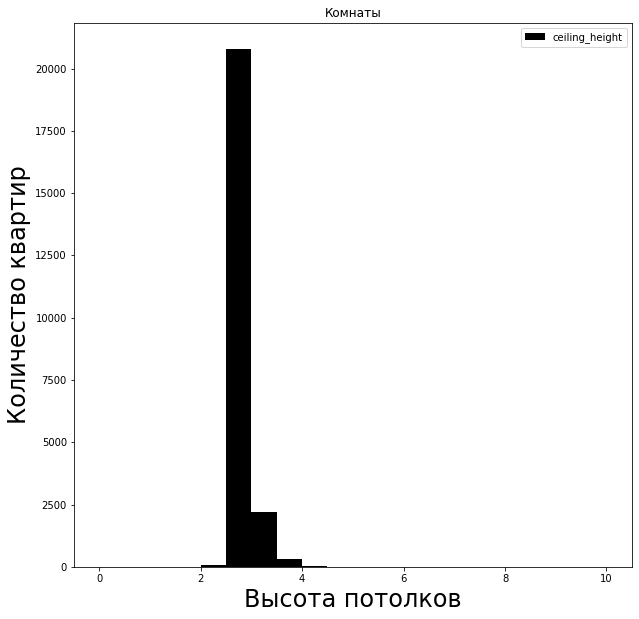

In [33]:
#Высота потолков
#get_wierd_ceilings_away = data[(data['ceiling_height'] >= 1.76) & (data['ceiling_height'] <= 15)]

stif = datanew.plot(colormap='CMRmap',y = 'ceiling_height', kind = 'hist', bins = 20, grid=False, figsize = (10,10), range = (0,10), title = 'Комнаты')
stif.set_ylabel('Количество квартир',fontdict={'fontsize':24})
stif.set_xlabel('Высота потолков',fontdict={'fontsize':24})
print('Объекты недвижимости с самыми высокими потолками:')
print(datanew['ceiling_height'].sort_values(ascending=False).head())
print()
print('Объекты недвижимости с самыми низкими потолками')
print(datanew['ceiling_height'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['ceiling_height'].describe()

<div class="alert alert-info">
<H1>ВЫСОТА ПОТОЛКОВ ВЫВОД:</H1>
<br>-Большее количество объектов имеют высоту потолков в районе 2.7м. сильного выброса других вариантов нет

<div class="alert alert-info">
<H1>ПЛОЩАДЬ КУХНИ</H1>

Объекты недвижимости с самой большой площадью кухни:
19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

Объекты недвижимости с самой маленькой площадью кухни:
20217    1.3
6262     2.0
21419    2.0
9138     2.0
16367    2.0
Name: kitchen_area, dtype: float64

Подробнее:


count    23406.000000
mean        10.538082
std          5.980567
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

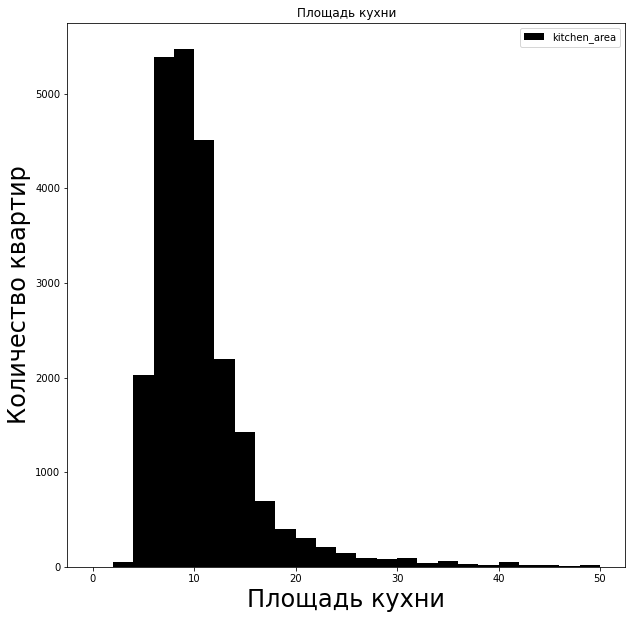

In [34]:
#Площадь кухни
kitch_ar = datanew.plot(colormap='CMRmap',y = 'kitchen_area', kind = 'hist', bins = 25, grid=False, figsize = (10,10), range = (0,50), title = 'Площадь кухни')
kitch_ar.set_ylabel('Количество квартир',fontdict={'fontsize':24})
kitch_ar.set_xlabel('Площадь кухни',fontdict={'fontsize':24})
print('Объекты недвижимости с самой большой площадью кухни:')
print(datanew['kitchen_area'].sort_values(ascending=False).head())
print()
print('Объекты недвижимости с самой маленькой площадью кухни:')
print(datanew['kitchen_area'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['kitchen_area'].describe()

<div class="alert alert-info">
<H1>ПЛОЩАДЬ КУХНИ ВЫВОД:</H1>
<br>-По построенному графику можно сделать вывод, что средняя площадть кухонь, представленных в датафрейме равна ~10.5 кв.м
<br>-Соответственно чем больше площадь кухни - тем скорее всего больше общая площадь всего объекта недвижимости. таких объектов в датафрейме меньше, но они все же есть
<br>-Соответственно этот фактор тоже влияет на общую картину стоимости квартир

<div class="alert alert-info">
<H1>ЖИЛАЯ ПЛОЩАДЬ</H1>

Объекты недвижимости с самой большой жилой площадью:
19540    409.700000
5358     409.000000
3117     360.288168
4237     332.000000
12859    322.300000
Name: living_area, dtype: float64

Объекты недвижимости с самой маленькой жилой площадью:
13915    2.0
23574    3.0
3242     3.0
21943    5.4
16431    6.0
Name: living_area, dtype: float64

Подробнее:


count    23406.000000
mean        34.629169
std         21.968881
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

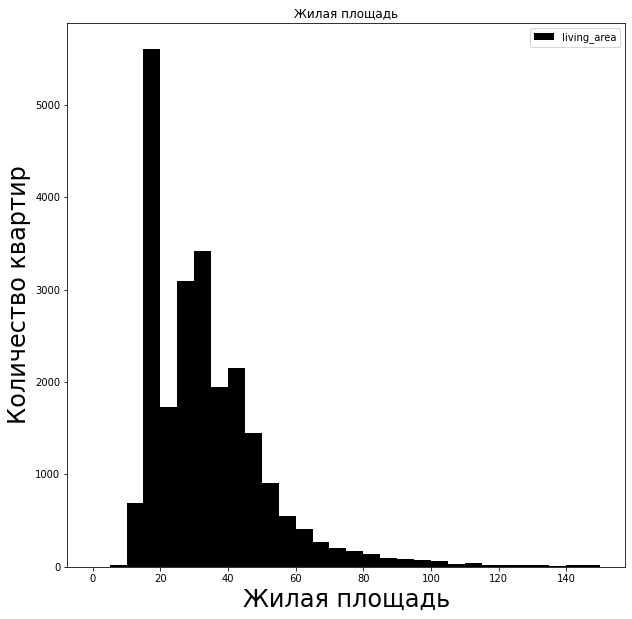

In [35]:
#Жилая площадь
living_ar = datanew.plot(colormap='CMRmap',y = 'living_area', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,150), title = 'Жилая площадь')
living_ar.set_ylabel('Количество квартир',fontdict={'fontsize':24})
living_ar.set_xlabel('Жилая площадь',fontdict={'fontsize':24})
print('Объекты недвижимости с самой большой жилой площадью:')
print(datanew['living_area'].sort_values(ascending=False).head())
print()
print('Объекты недвижимости с самой маленькой жилой площадью:')
print(datanew['living_area'].sort_values(ascending=True).head())
print('')
print('Подробнее:')
datanew['living_area'].describe()

<div class="alert alert-info">
<H1>ЖИЛАЯ ПЛОЩАДЬ ВЫВОД:</H1>
<br>-По построенному графику можно наблюдать два пика значений, первый пик это скорее все однокомнатные квартиры, а второй пик это мб микс 2 и 3 комнатных вариантов
<br>-в целом средняя площадь объектов, представленных в датасете 34 кв.м

<div class="alert alert-info">
<H1>ЭТАЖ</H1>

count    23406.000000
mean         5.875160
std          4.866222
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

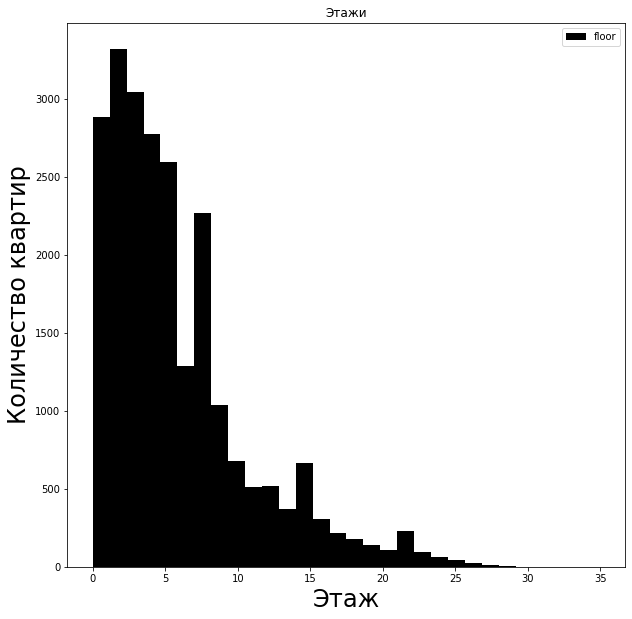

In [36]:
#Этаж
floor_check = datanew.plot(colormap='CMRmap',y = 'floor', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,35), title = 'Этажи')
floor_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
floor_check.set_xlabel('Этаж',fontdict={'fontsize':24})
datanew['floor'].describe()

<div class="alert alert-info">
<H1>ЭТАЖ ВЫВОД:</H1>
<br>На данном графике мы видим, что большинство объектов расположено в пределах первых 6 этажей
<br>Так же есть объекты и на более высоких этажах
<br>Максимальный этаж: 33
<br>Минимальный этаж: 1


<div class="alert alert-info">
<H1>ТИП ЭТАЖА (Первый, последний, другой)</H1>

<AxesSubplot:xlabel='floor_type'>

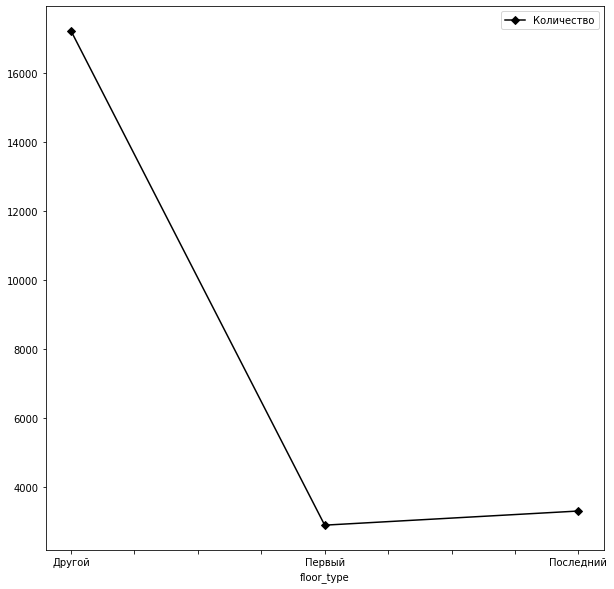

In [37]:
#Тип этажа
floor_type_check = datanew.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count'])
floor_type_check.columns = ['Количество']
floor_type_check.plot(colormap='CMRmap',grid=False, style='D-',figsize = (10,10),y = 'Количество')

<div class="alert alert-info">
<H1>ТИП ЭТАЖА (Первый, последний, другой) ВЫВОД:</H1>
<br>Можно сказать, что обычно квартиры на первом этаже дешевле всего, чуть дороже квартиры на самом последнем этаже, но самые дорогие квартиры относятся к категории "Другой"

<div class="alert alert-info">
<H1>ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ</H1>
<br>

count    23323.000000
mean        10.635510
std          6.567026
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

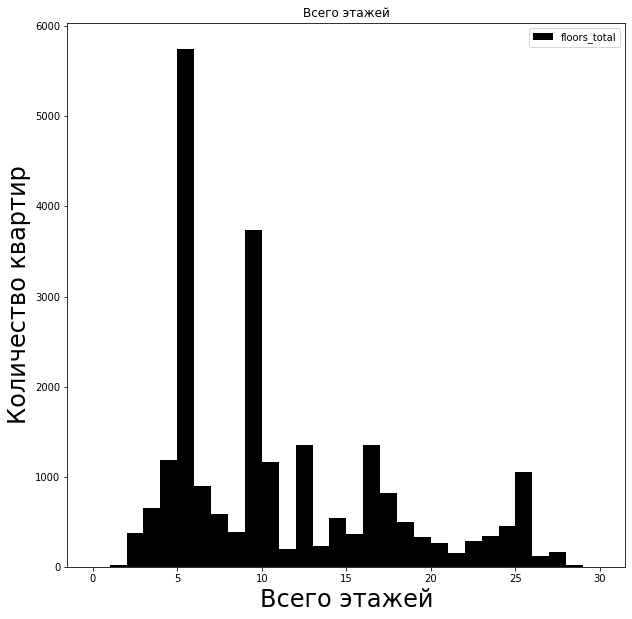

In [38]:
#Общее количетсво этажей
get_zero_floors_away = datanew[(datanew['floors_total'] > 0)]
floor_check = get_zero_floors_away.plot(colormap='CMRmap',y = 'floors_total', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,30), title = 'Всего этажей')
floor_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
floor_check.set_xlabel('Всего этажей',fontdict={'fontsize':24})
get_zero_floors_away['floors_total'].describe()

<div class="alert alert-info">
<H1>ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ ВЫВОД:</H1>
<br>На представленном графике видны некие выбросы данных, но на самом деле это не выбросы. Можно предположить, что это просто своеобразные типы домов. предложений в домах 5 и 10 этажей больше, потому что это может быть какая-то комплексная застройка
<br>Максимальное количество этажей в доме: 60
<br>Минимальное количество этажей в доме: 1

<div class="alert alert-info">
<H1>РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ</H1>

count    17985.000000
mean     14219.448707
std       8621.533063
min        181.000000
25%       9267.000000
50%      13107.000000
75%      16298.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

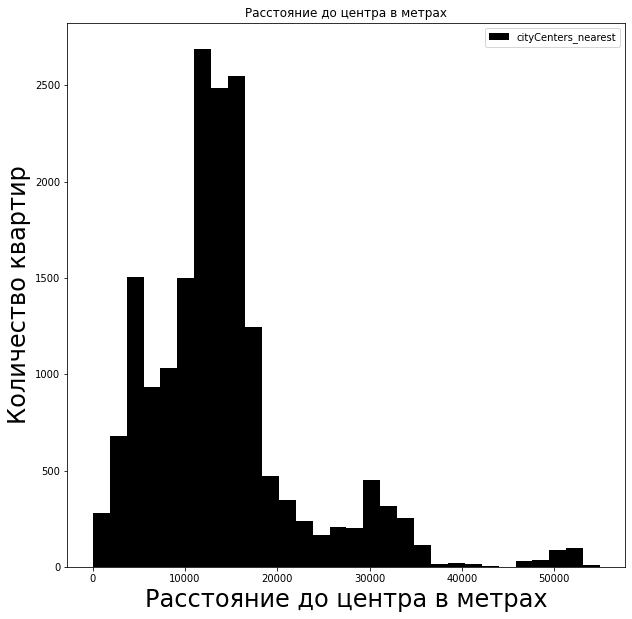

In [39]:
#Расстояние до центра города в метрах
distance_to_center_check = datanew.plot(colormap='CMRmap',y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,55000), title = 'Расстояние до центра в метрах')
distance_to_center_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
distance_to_center_check.set_xlabel('Расстояние до центра в метрах',fontdict={'fontsize':24})
datanew['cityCenters_nearest'].describe()

<div class="alert alert-info">
<H1>РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ ВЫВОД:</H1>
<br>По представленному графику можно сказать, что большинство объектов в датафрейме располагаются на расстоянии примерно в 14км от центра. таких предложений больше всего, но также есть предложения еще ближе к центру, скорее всего такие объекты будут стоить гораздо дороже, но это мы сможем посмотреть далее по проекту

<div class="alert alert-info">
<H1>расстояние до ближайшего аэропорта</H1>

count    17964.000000
mean     28834.110276
std      12636.241726
min       6450.000000
25%      18585.000000
50%      26772.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

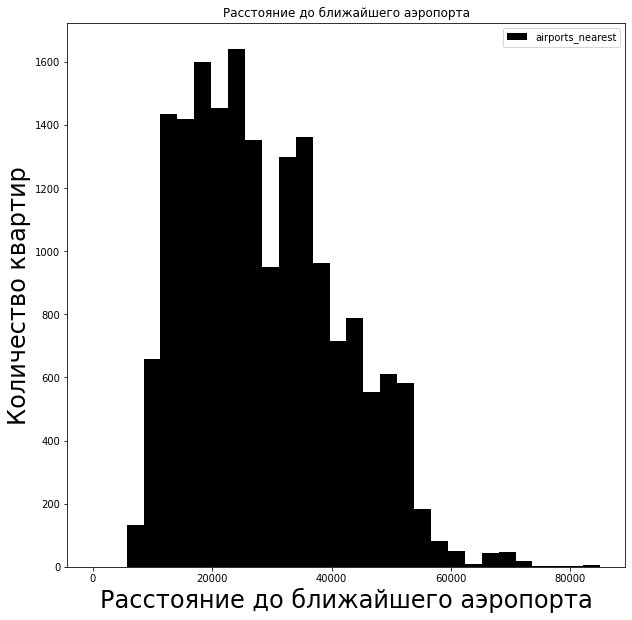

In [40]:
#Расстояние до ближайшего аэропорта
get_zero_distance_away = datanew[(datanew['airports_nearest'] >= 0.1)]
distance_to_center_check = get_zero_distance_away.plot(colormap='CMRmap',y = 'airports_nearest', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,85000), title = 'Расстояние до ближайшего аэропорта')
distance_to_center_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
distance_to_center_check.set_xlabel('Расстояние до ближайшего аэропорта',fontdict={'fontsize':24})
get_zero_distance_away['airports_nearest'].describe()

<div class="alert alert-info">
<H1>расстояние до ближайшего аэропорта ВЫВОД:</H1>
<br>По представленному графику можно сказать, что большинство объектов в датафрейме располагаются на расстоянии примерно в 29км от ближайшего аэропорта
<br>Объект дальше всего расположенный от аэропорта: 85 км.
<br>Объект ближе всего расположенный к аэропорту: 6 км.

<div class="alert alert-info">
<H1>расстояние до ближайшего парка</H1>

count    8006.000000
mean      490.460655
std       342.842065
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

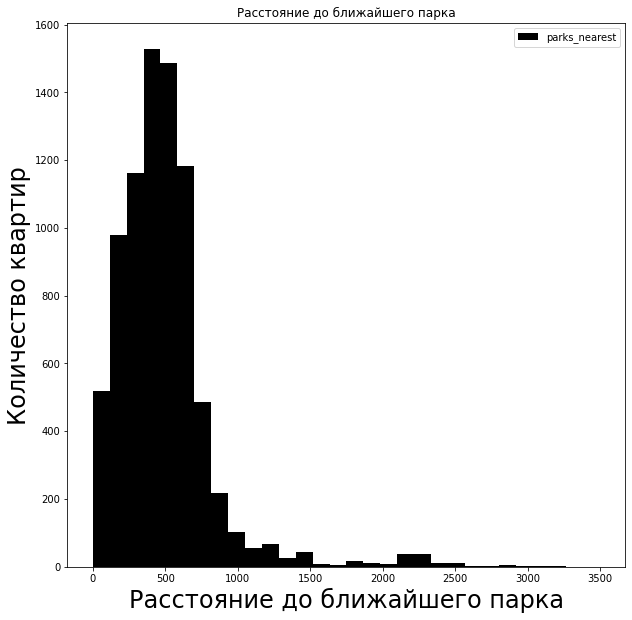

In [41]:
#Расстояние до ближайшего парка
get_zero_distance_away = datanew[(datanew['parks_nearest'] >= 0.1)]
distance_to_center_check = get_zero_distance_away.plot(colormap='CMRmap',y = 'parks_nearest', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (0,3500), title = 'Расстояние до ближайшего парка')
distance_to_center_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
distance_to_center_check.set_xlabel('Расстояние до ближайшего парка',fontdict={'fontsize':24})
get_zero_distance_away['parks_nearest'].describe()

<div class="alert alert-info">
<H1>расстояние до ближайшего парка ВЫВОД:</H1>
<br>По представленному графику можно сказать, что большинство объектов в датафрейме располагаются на расстоянии примерно в 500 м от ближайшего парка
<br>Объект дальше всего расположенный от парка: 3 км.
<br>Объект ближе всего расположенный к парку: 1 м.

<div class="alert alert-info">
<H1>день публикации объявления</H1>

count    23406.000000
mean         2.568572
std          1.790065
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: date_weekday, dtype: float64

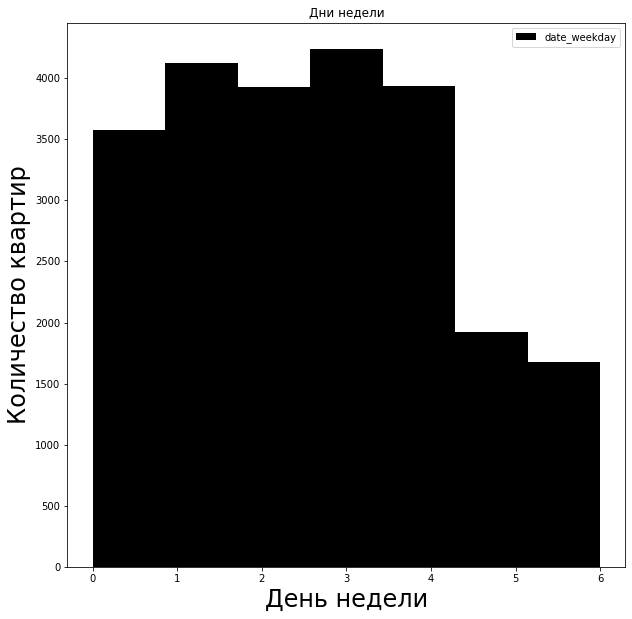

In [42]:
#День недели публикации объявления
days_to_check = datanew.plot(colormap='CMRmap',y = 'date_weekday', kind = 'hist', bins = 7, grid=False, figsize = (10,10), range = (0,6), title = 'Дни недели')
days_to_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
days_to_check.set_xlabel('День недели',fontdict={'fontsize':24})
#days_to_check.set_xticklabels(['Воскресенье', 'Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота'])
datanew['date_weekday'].describe()

<div class="alert alert-info">
<H1>день публикации объявления ВЫВОД:</H1>
<br>Из представленного графика можно сделать вывод, что количество объявлений значительно меньше в выходные дни, в остальном количество объявление от дня недели не сильно меняется

<div class="alert alert-info">
<H1>месяц публикации объявления</H1>

count    23406.000000
mean         6.392207
std          3.490185
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: date_month, dtype: float64

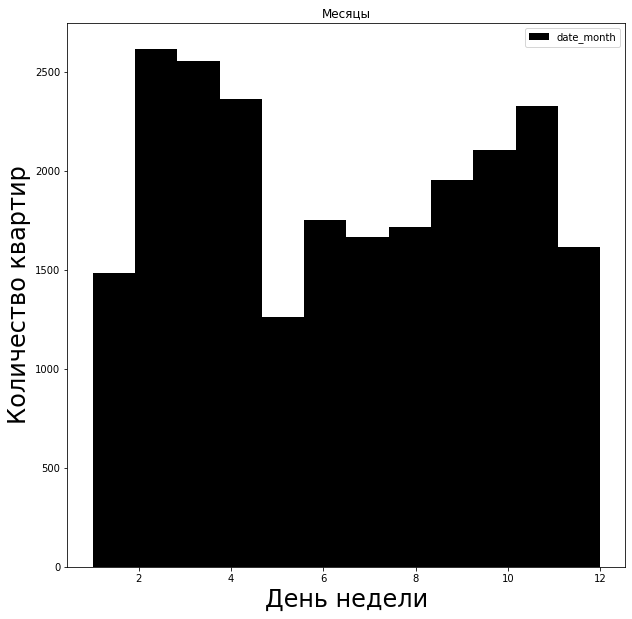

In [43]:
#Месяц публикации объявления
months_to_check = datanew.plot(colormap='CMRmap',y = 'date_month', kind = 'hist', bins = 12, grid=False, figsize = (10,10), range = (1,12), title = 'Месяцы')
months_to_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
months_to_check.set_xlabel('День недели',fontdict={'fontsize':24})
#months_to_check.set_xticklabels(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
datanew['date_month'].describe()

<div class="alert alert-info">
<H1>месяц публикации объявления ВЫВОД:</H1>
<br>Из представленного графика можно сделать вывод, что ближе к лету количество объявлений падает. возможно это зависит от сезонности или специфики работы агенств по недвижимости

<div class="alert alert-info">
<H1>Год публикации объявления</H1>

count    23406.000000
mean      2017.366060
std          1.041575
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: date_year, dtype: float64

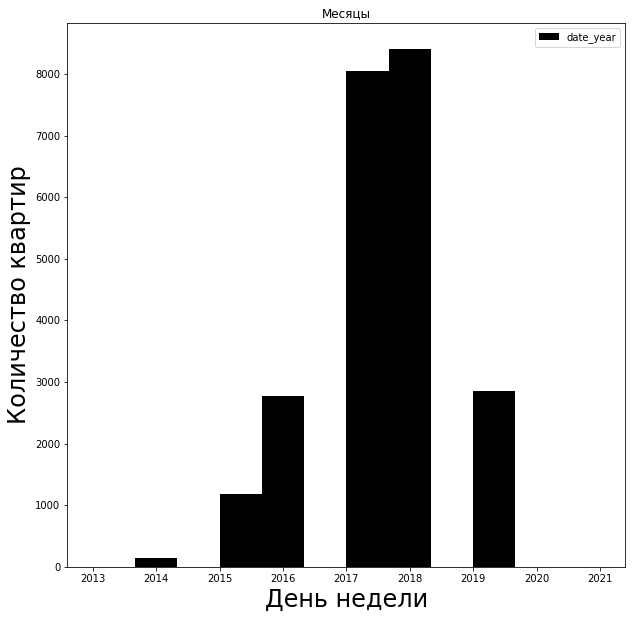

In [44]:
#Год публикации объявления
months_to_check = datanew.plot(colormap='CMRmap',y = 'date_year', kind = 'hist', bins = 12, grid=False, figsize = (10,10), range = (2013,2021), title = 'Месяцы')
months_to_check.set_ylabel('Количество квартир',fontdict={'fontsize':24})
months_to_check.set_xlabel('День недели',fontdict={'fontsize':24})
datanew['date_year'].describe()

<div class="alert alert-info">
<H1>Год публикации объявления ВЫВОД:</H1>
<br>Из представленного графика видно, что большинство записей приходится на 2017 и 2018 года, также есть немного данных за 2014 год, а также 2015, 2016, 2019 года

<div class="alert alert-info">
<b>Изучение параметров 2:</b>
<br>-Время продажи квартиры
<br>-Убрать редкие и выбивающиеся значения 
<br>-Какие факторы влияют на стоимость квартиры
<br>-Выбрать 10 населенных пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих пунктах
<br>-Квартиры в СПБ. средняя цена за км до центра
<br>-Сегмент квартир в центре: площадь, цена, число комнат, высота потолков. 

<div class="alert alert-info">
<H1>ВРЕМЯ ПРОДАЖИ КВАРТИР</H1>

Text(0.5, 0, 'Количество дней')

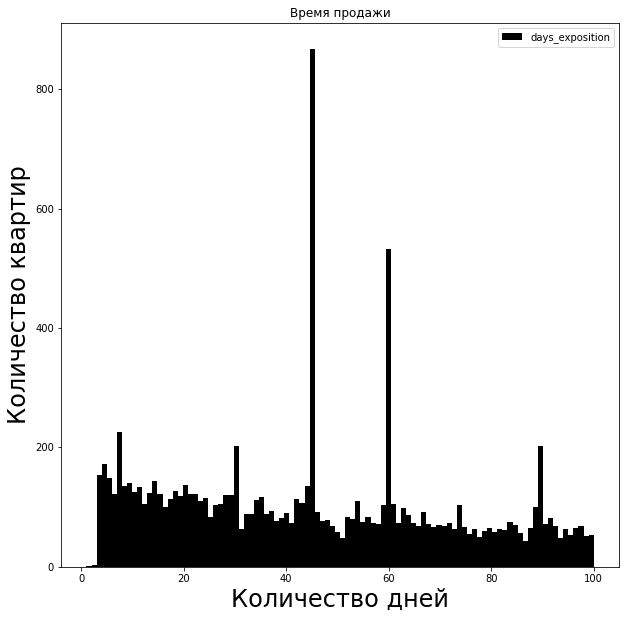

In [45]:
#Время продажи квартир
stif = datanew.plot(colormap='CMRmap',y = 'days_exposition', kind = 'hist', bins = 100, grid=False, figsize = (10,10), range = (1,100), title = 'Время продажи')
stif.set_ylabel('Количество квартир',fontdict={'fontsize':24})
stif.set_xlabel('Количество дней',fontdict={'fontsize':24})

In [46]:
#Посчитаем среднюю и медиану продаж квартир
print('Среднее по продаже квартир:', round(datanew['days_exposition'].mean(), 2))
print('Медиана по продаже квартир:', round(datanew['days_exposition'].median(), 2))
print('Максимум по продаже квартир:', round(datanew['days_exposition'].max(), 2))
print('Минимум по продаже квартир:', round(datanew['days_exposition'].min(), 2))

Среднее по продаже квартир: 181.35
Медиана по продаже квартир: 96.0
Максимум по продаже квартир: 1580.0
Минимум по продаже квартир: 1.0


<div class="alert alert-info">
<H1>ВРЕМЯ ПРОДАЖИ КВАРТИР ВЫВОД:</H1>
<br>Можем наблюдать всплески значений на 45, 60 и на 90 днях
<br>В связи с особенностью функционирования системы размещения объявлений на Яндекс.Недвижимость, объявления после наступления подобных сроков считаются неактуальными

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
<br>Средняя по продаже квартир: 181 день
<br>Медиана по продаже квартир: 96 дней
<br>Максимум по продаже квартир: 1580 дней (4.3 года)
<br>Минимум по продаже квартир: 1 день

<div class="alert alert-info">
<H1>УБРАТЬ РЕДКИЕ, ВЫБИВАЮЩИЕСЯ ЗНАЧЕНИЯ</H1>

Text(0.5, 0, 'Количество дней')

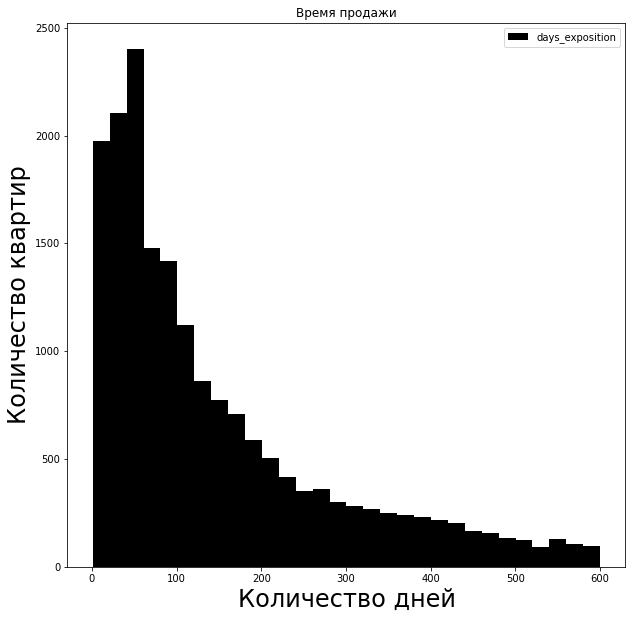

In [47]:
#Уберем значения 0 дней, 45 дней, 60 дней и 90 дней
remove_wierd_days = datanew.query('days_exposition > 5 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition < 600')

newdata = remove_wierd_days.plot(colormap='CMRmap',y = 'days_exposition', kind = 'hist', bins = 30, grid=False, figsize = (10,10), range = (1,600), title = 'Время продажи')
newdata.set_ylabel('Количество квартир',fontdict={'fontsize':24})
newdata.set_xlabel('Количество дней',fontdict={'fontsize':24})

In [48]:
#Вновь посчитаем среднюю и медиану продаж квартир (без выбросов)
print('Среднее по продаже квартир:', round(remove_wierd_days['days_exposition'].mean(), 2))
print('Медиана по продаже квартир:', round(remove_wierd_days['days_exposition'].median(), 2))
print('Максимум по продаже квартир:', round(remove_wierd_days['days_exposition'].max(), 2))
print('Минимум по продаже квартир:', round(remove_wierd_days['days_exposition'].min(), 2))

Среднее по продаже квартир: 145.35
Медиана по продаже квартир: 95.0
Максимум по продаже квартир: 599.0
Минимум по продаже квартир: 6.0


<div class="alert alert-info">
<H1>УБРАТЬ РЕДКИЕ, ВЫБИВАЮЩИЕСЯ ЗНАЧЕНИЯ ВЫВОД:</H1>
<br>Посмотрев на датафрейм без выбросов значений - мы видим, что предложения квартир с течением времени становится меньше
<br>Убрав значения меньше 600 в качестве теста мы видим по максимальному значению (599) что это не артефакт, а реально длительная продажа объекта недвижимости
<br>это значит, что пик продаж происходит в первые 100 дней
<br>исходя из этого можно сделать выводы, что продажа прошла быстро это примерно месяц, а очень долго - больше года

<div class="alert alert-info">
<H1>ЧТО ВЛИЯЕТ НА СТОИМОСТЬ КВАРТИР</H1>

<div class="alert alert-info">
<b>ЦЕНА и ПЛОЩАДЬ</b>


Прослеживается корреляция между площадью квартиры и ценой


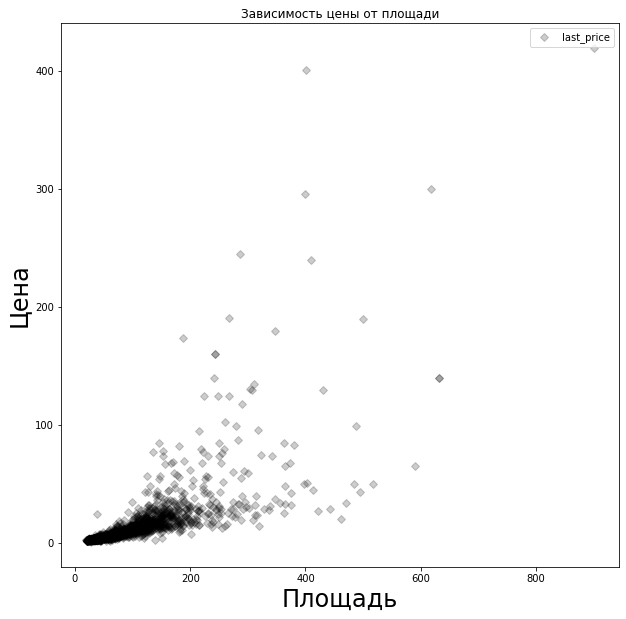

In [49]:
#Зависимость цены и площади
space_to_price = datanew.pivot_table(index='total_area', values='last_price').plot(colormap='CMRmap', style='D', alpha = 0.2, grid=False, figsize = (10,10), title = 'Зависимость цены от площади')
space_to_price.set_ylabel('Цена',fontdict={'fontsize':24})
space_to_price.set_xlabel('Площадь',fontdict={'fontsize':24})
print()
print('Прослеживается корреляция между площадью квартиры и ценой')

<div class="alert alert-info">
<br>Вывод:
<br>На данном графике видим, что явно прослеживается кореляция между ценой и площадью объекта недвижимости
<br>Чем больше площадь - тем выше цена

<div class="alert alert-info">
<b>ЦЕНА и ЖИЛАЯ ПЛОЩАДЬ</b>


Прослеживается корреляция между жилой площадью квартиры и ценой


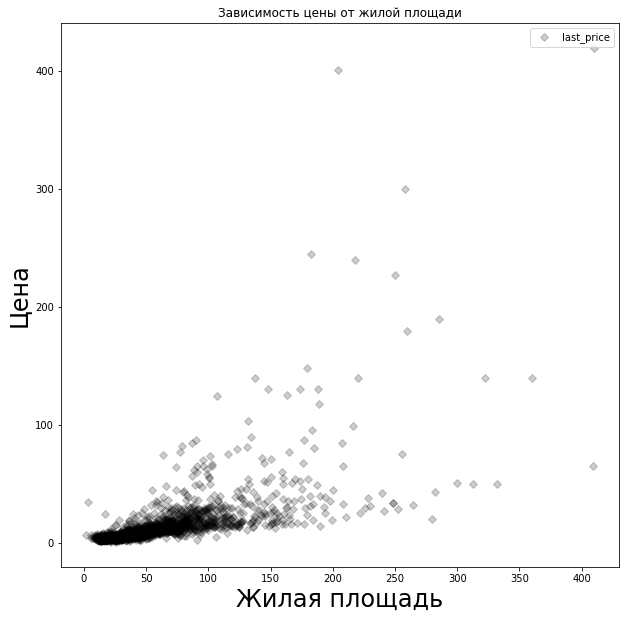

In [50]:
#Зависимость цены и жилой площади
living_space_to_price = datanew.pivot_table(index='living_area', values='last_price').plot(colormap='CMRmap', style='D', alpha = 0.2, grid=False, figsize = (10,10), title = 'Зависимость цены от жилой площади')
living_space_to_price.set_ylabel('Цена',fontdict={'fontsize':24})
living_space_to_price.set_xlabel('Жилая площадь',fontdict={'fontsize':24})
print()
print('Прослеживается корреляция между жилой площадью квартиры и ценой')

<div class="alert alert-info">Вывод:
<br>На данном графике видим, что прослеживается креляция между объемом жилой площади и ценой. Чем больше живая площадь - тем выше цена.
<br>Данный показатель поддерживает показатель общей площади. чем выше общая площадь - тем соответственно будет и больше жилая площадь, а значит и общая стоиомсть недвижимости будет выше

<div class="alert alert-info">
<b>ЦЕНА и ПЛОЩАДЬ КУХНИ</b>


Прослеживается корреляция между площадью кухни и ценой


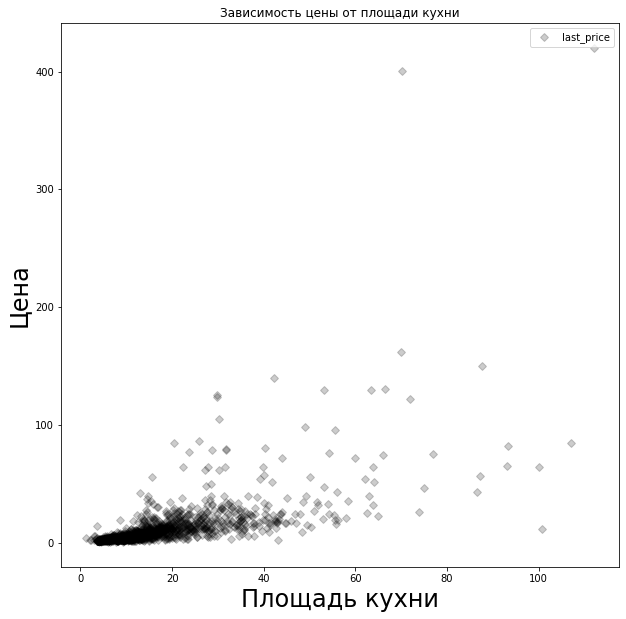

In [51]:
#Зависимость цены и площадью кухни
kitchenspace_to_price = datanew.pivot_table(index='kitchen_area', values='last_price').plot(colormap='CMRmap', style='D', alpha = 0.2, grid=False, figsize = (10,10), title = 'Зависимость цены от площади кухни')
kitchenspace_to_price.set_ylabel('Цена',fontdict={'fontsize':24})
kitchenspace_to_price.set_xlabel('Площадь кухни',fontdict={'fontsize':24})
print()
print('Прослеживается корреляция между площадью кухни и ценой')

<div class="alert alert-info">Вывод:
<br>На данном графике видим, что прослеживается креляция между объемом площади кухни и ценой. Чем больше площадь кухни - тем выше цена.
<br>Данный показатель поддерживает показатель общей площади, а также жилой площади. чем выше общая площадь - тем соответственно будет и больше площадь кухни, а значит и общая стоиомсть недвижимости будет выше

<div class="alert alert-info">
<b>ЦЕНА и КОЛИЧЕСТВО КОМНАТ</b>


Корреляция между количеством комнат и ценой


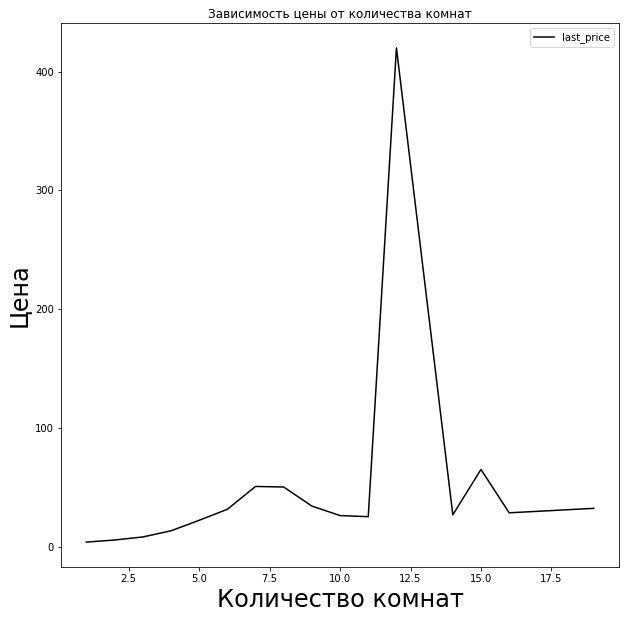

In [52]:
#Зависимость цены от количества комнат
rooms_to_price = datanew.pivot_table(index='rooms', values='last_price').plot(colormap='CMRmap', style='-', alpha = 1, grid=False, figsize = (10,10), title = 'Зависимость цены от количества комнат')
rooms_to_price.set_ylabel('Цена',fontdict={'fontsize':24})
rooms_to_price.set_xlabel('Количество комнат',fontdict={'fontsize':24})
print()
print('Корреляция между количеством комнат и ценой')

<div class="alert alert-info">
<br>Вывод:
<br>На данном графике видим, что явно прослеживается кореляция между ценой и количеством комнат

<div class="alert alert-info">
<b>ЦЕНА и ТИП ЭТАЖА (Последний, Первый и Другой)</b>


Корреляция между типом этажа и ценой


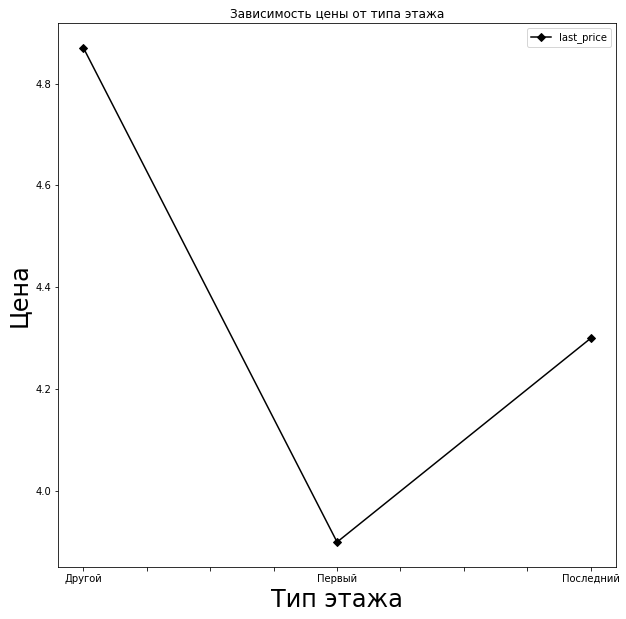

In [53]:
#Зависимость цены от тип этажа
type_of_rooms_to_price = datanew.pivot_table(index='floor_type', values='last_price', aggfunc = 'median').plot(colormap='CMRmap', style='D-', alpha = 1, grid=False, figsize = (10,10), title = 'Зависимость цены от типа этажа')
type_of_rooms_to_price.set_ylabel('Цена',fontdict={'fontsize':24})
type_of_rooms_to_price.set_xlabel('Тип этажа',fontdict={'fontsize':24})
print()
print('Корреляция между типом этажа и ценой')

<div class="alert alert-info">Вывод:
<br>На данном графике видим, что стоимость жилья на первом этаже обычно ниже, чем на других типах этажей
<br>Жилье на последнем этаже обычно дороже, чем объекты на первом этаже, но дешевле чем другие варианты
<br>Люди выбирают чаще покупку жилья ни на первом, ни на последних этажах

<div class="alert alert-info">
<b>ЦЕНА и удаленность от центра</b>

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='Удаленность от центра в км', ylabel='Цена'>

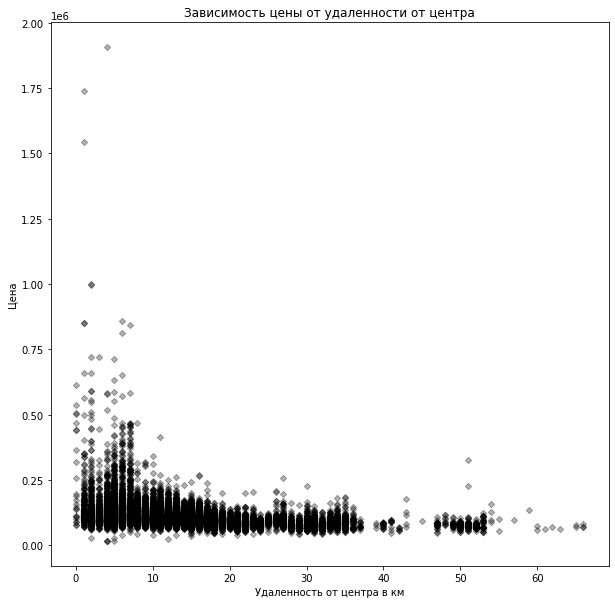

In [54]:
#Зависимость цены от удаленности от центра
datanew.plot(color='black',marker='D', kind = 'scatter', y = 'price_per_metersquared', x = 'cityCenters_nearest_inKM', alpha = 0.3, figsize=(10,10), xlabel = 'Удаленность от центра в км', ylabel='Цена', title='Зависимость цены от удаленности от центра')

<div class="alert alert-info">
<br>Вывод:
<br>Наблюдаем зависимость в цене относительно удаленности от центра. чем ближе к центру - тем дороже

<div class="alert alert-info">
<b>ЦЕНА и День недели</b>

<AxesSubplot:xlabel='date_weekday'>

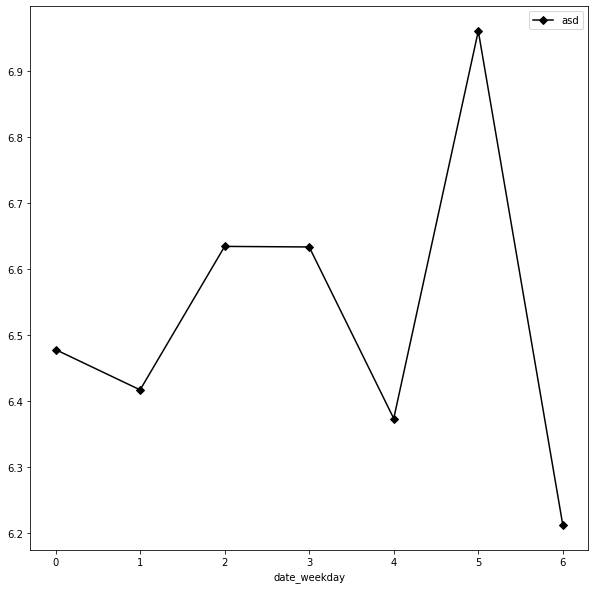

In [55]:
asd= datanew.pivot_table(index = 'date_weekday', values = 'last_price', aggfunc = 'mean')
asd.columns=['asd']
asd.plot(y='asd',color='black',marker='D', figsize=(10,10))

<div class="alert alert-info">
<br>Вывод:
<br>В воскресенье цены указываются самые низкие. наверное потому, что в воскресенье люди отдыхают

<div class="alert alert-info">
<b>ЦЕНА и Месяц</b>

<AxesSubplot:xlabel='date_month'>

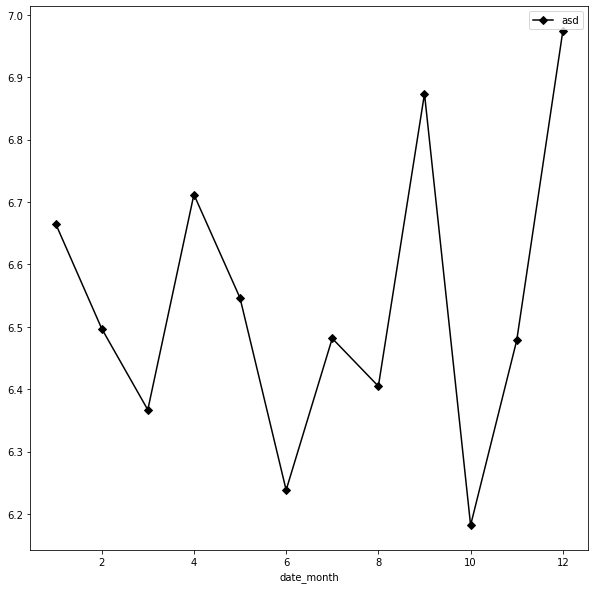

In [56]:
asd= datanew.pivot_table(index = 'date_month', values = 'last_price', aggfunc = 'mean')
asd.columns=['asd']
asd.plot(y='asd',color='black',marker='D', figsize=(10,10))

<div class="alert alert-info">
<br>Вывод:
<br>под конец года идет повышение.Но в целом, в течении года можно сказать, что каждые два месяца бывают скидки на жилье, для покупателя это была бы ценная информация

<div class="alert alert-info">
<b>ЦЕНА и год</b>

<AxesSubplot:xlabel='date_year'>

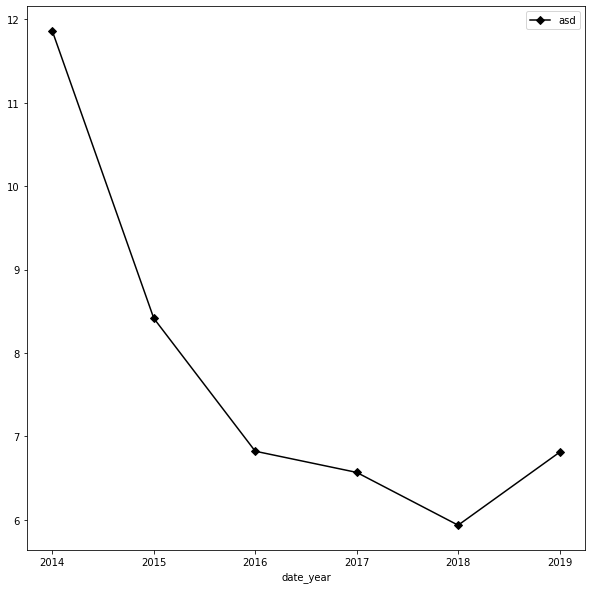

In [57]:
asd= datanew.pivot_table(index = 'date_year', values = 'last_price', aggfunc = 'mean')
asd.columns=['asd']
asd.plot(y='asd',color='black',marker='D', figsize=(10,10))

<div class="alert alert-info">
<br>Вывод:
<br>после 2014 года заметно падение цен на недвижимость (wasn't that a surprise)
<br>вангую, что ситуация после февраля 2022 будет показывать аналогичную картину в новом датафрейме. поживем - увидим

<div class="alert alert-info">
<H1>Выбрать 10 населенных пунктов с наибольшим числом объявлений.Посчитать среднюю цену квадратного метра в этих пунктах</H1>

In [58]:
#создаим совдную, по названию населенного пункта и ценой за 1 кв.м
top10_cities = datanew.pivot_table(index='new_locality_name', values='price_per_metersquared', aggfunc=['count', 'mean'])
#уберем лишние знаки после запятой
top10_cities['mean'] = round(top10_cities['mean'], 2)
#переименуем столбцы
top10_cities.columns = ['Top-10', 'SREDNAYA']
print(top10_cities.sort_values('Top-10', ascending = False).head(10))

                   Top-10   SREDNAYA
new_locality_name                   
Санкт-Петербург     15538  114542.37
поселок Мурино        528   85040.96
поселок Шушары        436   78405.74
Всеволожск            391   68568.27
Пушкин                367  103013.38
Колпино               338   75424.58
поселок Парголово     323   90289.78
Гатчина               306   68757.68
деревня Кудрово       283   92297.22
Выборг                236   58093.89


<div class="alert alert-info">
<br>Вывод:
<br>Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге

<div class="alert alert-info">
<H1>Квартиры в СПБ. средняя цена за км до центра</H1>


Судя по высоким колебаниям в рейндже от 0 до ~8 это и будетя являться центральной зоной, внутри этой зоны большой разброс цен, а вне этой зоны цена на жилье сильно падает


/tmp/ipykernel_735/2668732080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_na_objects['cityCenters_nearest_inKM'] = round(drop_na_objects['cityCenters_nearest'] / 1000, 1)


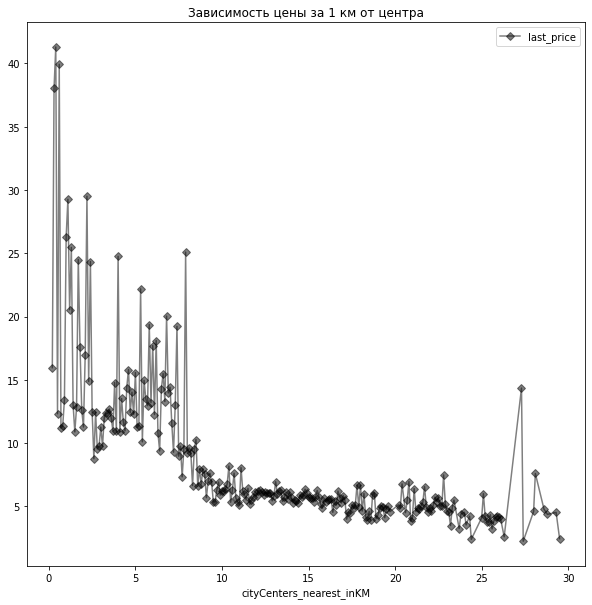

In [59]:
#Так как есть записи с пустыми значениями - не будем брать их в рассмотрение 
drop_na_objects = datanew.dropna(subset=['cityCenters_nearest'])
#добавим столбец, в котором переведем все в км (оставим 1 знак после запятой)
drop_na_objects['cityCenters_nearest_inKM'] = round(drop_na_objects['cityCenters_nearest'] / 1000, 1)
(
    drop_na_objects.query('new_locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_inKM', values='last_price')
    .plot(colormap='CMRmap', style='D-', alpha = 0.5, grid=False, figsize = (10,10), title = 'Зависимость цены за 1 км от центра')
)
print('')
print('Судя по высоким колебаниям в рейндже от 0 до ~8 это и будетя являться центральной зоной, внутри этой зоны большой разброс цен, а вне этой зоны цена на жилье сильно падает')

<div class="alert alert-info">
<br>Вывод:
<br>Судя по высоким колебаниям в рейндже от 0 до ~8 это и будетя являться центральной зоной, внутри этой зоны большой разброс цен, а вне этой зоны цена на жилье сильно падает

### Общий вывод

<div class="alert alert-info">
<b>Общие выводы v2:</b>
<br>Мы изучили датафрейм, посмотрели на наличие ошибок, выявили конкретные артефакты.
<br>Там где возможно - мы произвели заполнение пустот/устранение ошибок логически подходящими данными
<br>Данные, которые явно являлись артефактами и ошибки в которых мы не смогли заменить логически подходящими значениями мы отфильтровали.
<br>Также мы добавили свои столбцы, которые помогут в дальнейшей работе с датафреймом, можно делать срезы на год, месяц, неделю, также мы добавили тип расположения на этаже в доме
<br>Из изучения данных можно сделать выводы: на стоимость квартиры сильно влияет площадь (как общая, так и отдельно жилая площадь и площадь кухни), количество комнат, тип этажа (мы выяснили, что люди наибольший интерес вызывают объекты не на первом и не на последних этажах, а где-то посередине). так же мы выяснили, что на стоимость влияет непосредственная близость к центру, наличие парков, а также удаленность от аэропортов
<br>
<br>
<b>Подробные выводы:</b>
    <br><b>Площадь:</b>
    <br>-Средняя площадь квартир, представленных в датасете: 60.34 кв.м
    <br>-Есть объект недвижимости с площадью 900.0 кв.м, а также объект с площадью 12.0 кв.м - есть смысл сообщить об этом человеку, который отвечает за внесение данных в базу. чтобы была произведена проверка на корректность представленной информации, возможно есть ошибка
    <p>
    <br><b>Цена:</b>
    <br>-Средняя цена квартир, представленных в датасете: 6.5 млн
    <br>-Максимальная цена квартиры, представленная в датасете: 763 млн
    <br>-Минимальная цена квартиры, представленная в датасете: 12190
    <br>В целом средняя цена не кажется странной, однако показания минимальной и максимальной цены заставляют задуматься. возможно были допущены ошибки при вводе данных. не хочется верить, что кто-то будет покупать квартиру за 763 млн. даже рублей
    <p>
    <br><b>Цена за 1 кв.м:</b>
    <br>-Средняя цена 1 кв.м квартир, представленных в датасете: 99421.65
    <br>-Максимальная цена 1 кв.м квартиры, представленная в датасете: 1.9 млн
    <br>-Минимальная цена 1 кв.м квартиры, представленная в датасете: 111.83
    <br>Судя по графику выбросов нет, и разброс цен вполне адекватный, но все же нужно уточнить на счет минимального и максимального значения. не было ли допущено ошибок
    <p>
    <br><b>Количество комнат:</b>
    <br>-Графики строили по значениям, не включающим в себя объекты недвижимости с 0 этажей. Распределение адекватное, 1 и 2 комнатных квартир больше, чем 3 комнатных, а также 1,2,3 комнатные квартиры количественно больше остальных типов квартир.
    <p>
    <br><b>Высота потолков:</b>
    <br>-Средняя высота потолков квартир, представленных в датасете: 2.7 м
    <br>-Максимальная высота потолка квартиры, представленная в датасете: 100 м
    <br>-Минимальная высота потолка квартиры, представленная в датасете: 1 м
    <br>Аналогично другим показателям - нужно уточнить откуда взялись неадекватные значения 100 м и 1 м